<a href="https://colab.research.google.com/github/Nagmashaik123/Section203-Group06/blob/main/Vacc_Reactions_Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv(r"ProcessedCovidVaccineReact.csv")
df

,Unnamed: 0,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,0,2021-03-28 23:59:54,22 CVS locations show #CovidVaccine slots in C...,22 cvs locations show covidvaccine slots in ca...,VaccineCa,Unknown,['CovidVaccine'],Unknown
1,1,2021-03-28 23:59:47,2020: We will be back to normal as soon as we ...,2020 we will be back to normal as soon as we h...,thinkbalancely,Australia,"['covid19qld', 'COVID19Aus', 'Covid_19', 'Covi...",Australia
2,2,2021-03-28 23:59:24,Amazingly if you open up the spots for younger...,amazingly if you open up the spots for younger...,AureliaCotta,Toronto,"['topoli', 'onpoli', 'COVID19Vaccine']",Canada
3,3,2021-03-28 23:58:40,@aussieinTO Exactly! Why are they hoarding vac...,aussieinto exactly why are they hoarding vacci...,JeanCourtney413,Retired Teacher/Public Servant,"['CovidVaccine', 'fordfiasco']",Unknown
4,4,2021-03-28 23:57:24,24 hours post-first #covid_19 shot &amp; thank...,24 hours postfirst covid_19 shot amp thankfull...,SumunLPendakur,Los Angeles,"['covid_19', 'vaccinated']",United States
...,...,...,...,...,...,...,...,...
178132,178132,2021-04-25 19:55:35,Double jabbed and feeling very happy (albeit i...,double jabbed and feeling very happy albeit it...,bears_katy,Unknown,"['COVID19Vaccine', 'GetVaccinated', 'FullyVacc...",Unknown
178133,178133,2021-04-25 19:55:12,Northlands is so busy right now you’d think th...,northlands is so busy right now youd think the...,Sharpie780,Edmonton,"['COVIDtesting', 'COVIDvaccine', 'COVIDab']",Canada
178134,178134,2021-04-25 19:55:03,#Covidvaccine clinics for eligible people with...,covidvaccine clinics for eligible people with ...,dudleymbc,Dudley,['Covidvaccine'],United Kingdom
178135,178135,2021-04-25 19:54:37,Guess who’s fully vaccinated now? 💉 #CovidVacc...,guess whos fully vaccinated now covidvaccine m...,enriquevbjr,California,"['CovidVaccine', 'Moderna', 'VaccinesWork', 'v...",United States


In [ ]:
# importing pandas module  
import pandas as pd  
# importing numpy module 
import numpy as np
# importing module for regex 
import re 
import matplotlib.pyplot as plt
# reading csv file having processed tweet reactions data column 
data_frame = pd.read_csv("ProcessedCovidVaccineReact.csv")
column_selected = data_frame[["CleanedTweet"]]
data = column_selected.copy()

In [ ]:
# counting the frequency of each reaction by observing tweet patterns 
data["ct1"]= data["CleanedTweet"].str.count("fever", re.I) 
data["ct2"]= data["CleanedTweet"].str.count( "chills", re.I) 
data["ct3"]= data["CleanedTweet"].str.count( "headache", re.I)  
data["ct5"]= data["CleanedTweet"].str.count( "cold", re.I) 
data["ct6"]= data["CleanedTweet"].str.count( "flu", re.I) 
data["ct7"]= data["CleanedTweet"].str.count( "body pain", re.I) 
data["ct8"]= data["CleanedTweet"].str.count( "body pains", re.I)
data["ct9"]= data["CleanedTweet"].str.count( "sore arm", re.I)
data["ct10"]= data["CleanedTweet"].str.count( "arm soreness", re.I)
data["ct11"]= data["CleanedTweet"].str.count( "arm sore", re.I)
data["ct12"]= data["CleanedTweet"].str.count( "swollen", re.I)
data["ct13"]= data["CleanedTweet"].str.count( "injection area", re.I)
data["ct14"]= data["CleanedTweet"].str.count( "tender arm", re.I)
data["ct15"]= data["CleanedTweet"].str.count( "cough", re.I)
data["ct16"]= data["CleanedTweet"].str.count( "coughing", re.I)
data["ct17"]= data["CleanedTweet"].str.count( "sore throat", re.I)
data["ct18"]= data["CleanedTweet"].str.count( "vomiting", re.I)
data["ct19"]= data["CleanedTweet"].str.count( "throw up", re.I)
data["ct20"]= data["CleanedTweet"].str.count( "nausea", re.I)

data["ct21"]= data["CleanedTweet"].str.count( "blood clots", re.I)

data["ct23"]= data["CleanedTweet"].str.count( "fatigue", re.I)

data["ct24"]= data["CleanedTweet"].str.count( "heartattack", re.I)
data["ct25"]= data["CleanedTweet"].str.count( "heart attack", re.I)
data["ct26"]= data["CleanedTweet"].str.count( "heartpain", re.I)
data["ct27"]= data["CleanedTweet"].str.count( "heart pain", re.I)

data["ct28"]= data["CleanedTweet"].str.count( "kidney", re.I)



In [ ]:
#aggrigating the similar reactions to one type
data["Fever"] = data["ct1"] 
data["Chills"] = data["ct2"]
data["Headache"]= data["ct3"] 
data["Cold"]= data["ct5"] + data["ct6"]
data["Body_pains"]= data["ct7"] + data["ct8"]
data["Arm_soreness"]= data["ct9"] + data["ct10"]+ data["ct11"]+ data["ct12"]+ data["ct13"]+ data["ct14"]
data["Cough"]= data["ct15"] + data["ct16"]+ data["ct17"]
data["Blood_clots"] = data["ct21"]
data["Vomitings"] = data["ct18"]+data["ct19"]+data["ct20"]
data["Fatigue"] = data["ct23"]
data["Heart_attack"] = data["ct24"]+data["ct25"]+data["ct26"]+data["ct27"]
data["Kidney_failure"] = data["ct28"]



In [ ]:
data

,CleanedTweet,ct1,ct2,ct3,ct4,ct5,ct6,ct7,ct8,ct9,ct10,ct11,ct12,ct13,ct14,ct15,ct16,ct17,ct18,ct19,ct20,ct21,ct23,ct24,ct25,ct26,ct27,ct28,Fever,Chills,Headache,Neck_pain,Cold,Body_pains,Arm_soreness,Cough,Blood_clots,Vomitings,Fatigue,Heart_attack,Kidney_failure
0,22 cvs locations show covidvaccine slots in ca...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020 we will be back to normal as soon as we h...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,amazingly if you open up the spots for younger...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,aussieinto exactly why are they hoarding vacci...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24 hours postfirst covid_19 shot amp thankfull...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178132,double jabbed and feeling very happy albeit it...,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
178133,northlands is so busy right now youd think the...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178134,covidvaccine clinics for eligible people with ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178135,guess whos fully vaccinated now covidvaccine m...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#dropping the previous count coloumns to clean the dataframe
dat_frame = data.drop(['ct1', 'ct2','ct3','ct5','ct6','ct7','ct8','ct9','ct10','ct11','ct12','ct13','ct14','ct15','ct16','ct17','ct18','ct19','ct20','ct21','ct23','ct24','ct25','ct26','ct27','ct28'], axis=1)

In [ ]:
dict = dat_frame.sum(axis = 0, skipna = True)
df = pd.DataFrame(list(dict.items()),columns = ['Reactions','Reaction_Count']) 
df

,Reactions,Reaction_Count
0,CleanedTweet,22 cvs locations show covidvaccine slots in ca...
1,Fever,924
2,Chills,493
3,Headache,971
4,Neck_pain,3
5,Cold,1722
6,Body_pains,44
7,Arm_soreness,1077
8,Cough,174
9,Blood_clots,981


In [ ]:
df = df.drop(0)
df

,Reactions,Reaction_Count
1,Fever,924
2,Chills,493
3,Headache,971
4,Neck_pain,3
5,Cold,1722
6,Body_pains,44
7,Arm_soreness,1077
8,Cough,174
9,Blood_clots,981
10,Vomitings,192


In [ ]:
df['Percentage_Reactions'] = (df['Reaction_Count'] / df['Reaction_Count'].sum()) * 100
decimals = 1    
df['Percentage_Reactions'] = df['Percentage_Reactions'].apply(lambda x: round(x, decimals))
df


,Reactions,Reaction_Count,Percentage_Reactions
1,Fever,924,12.6
2,Chills,493,6.7
3,Headache,971,13.3
4,Neck_pain,3,0.0
5,Cold,1722,23.5
6,Body_pains,44,0.6
7,Arm_soreness,1077,14.7
8,Cough,174,2.4
9,Blood_clots,981,13.4
10,Vomitings,192,2.6


In [53]:
# Plotting graphs for the reactions observed from the tweets using plotly

text= df['Percentage_Reactions'].tolist()
import plotly.express as px 
fig = px.scatter(df, x="Reactions", y="Percentage_Reactions",
                 color="Reactions",
                 size='Percentage_Reactions', 
                 hover_data=['Percentage_Reactions'],
                 text= text,
                 title= "% of over all reactions observed")
  
fig.show()

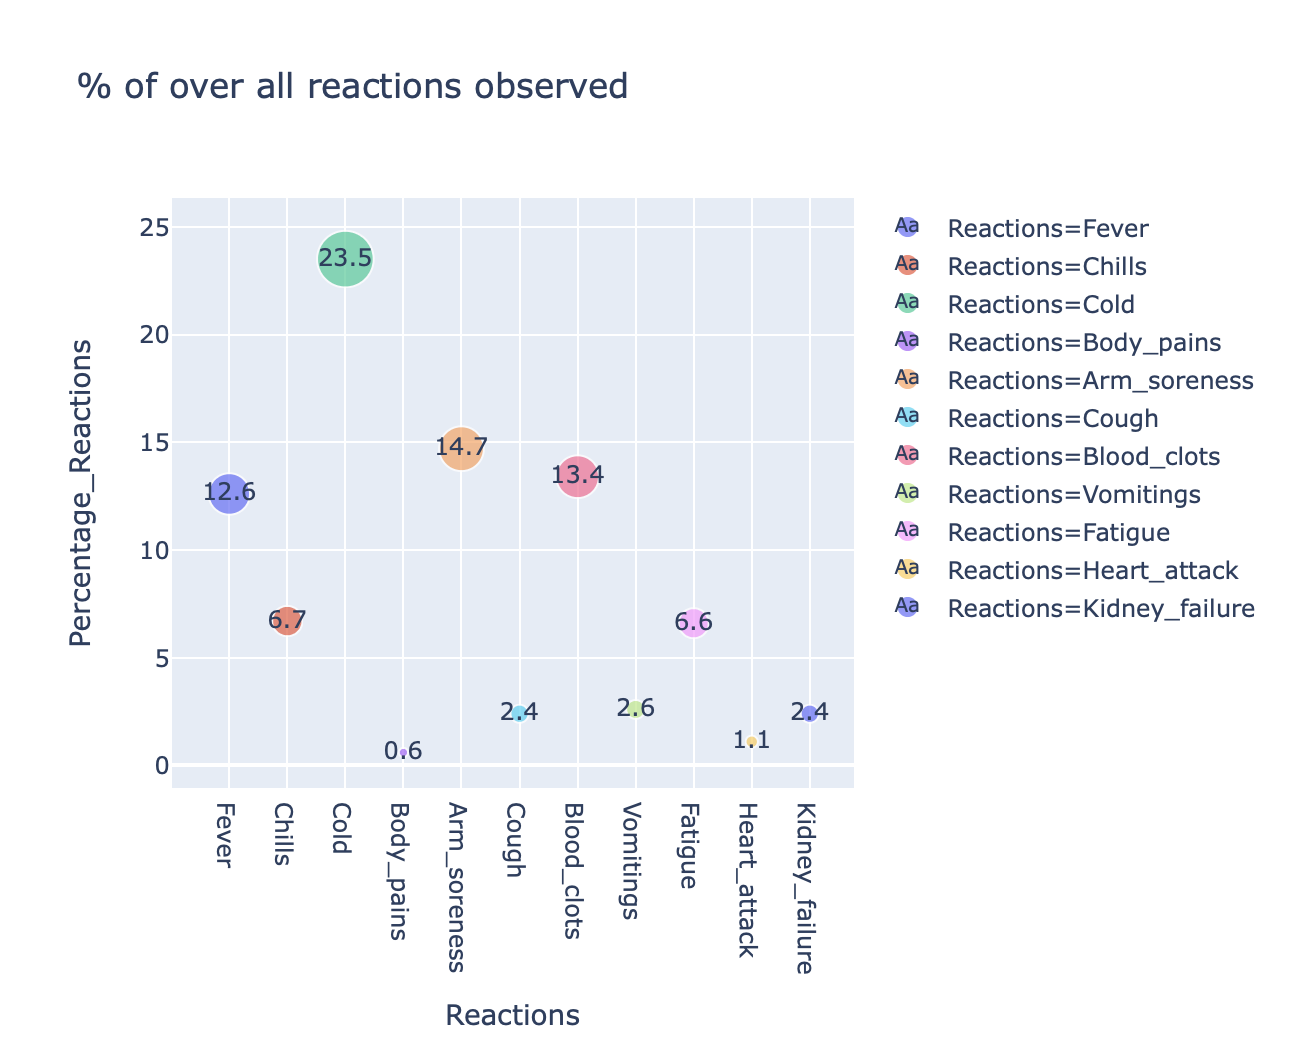

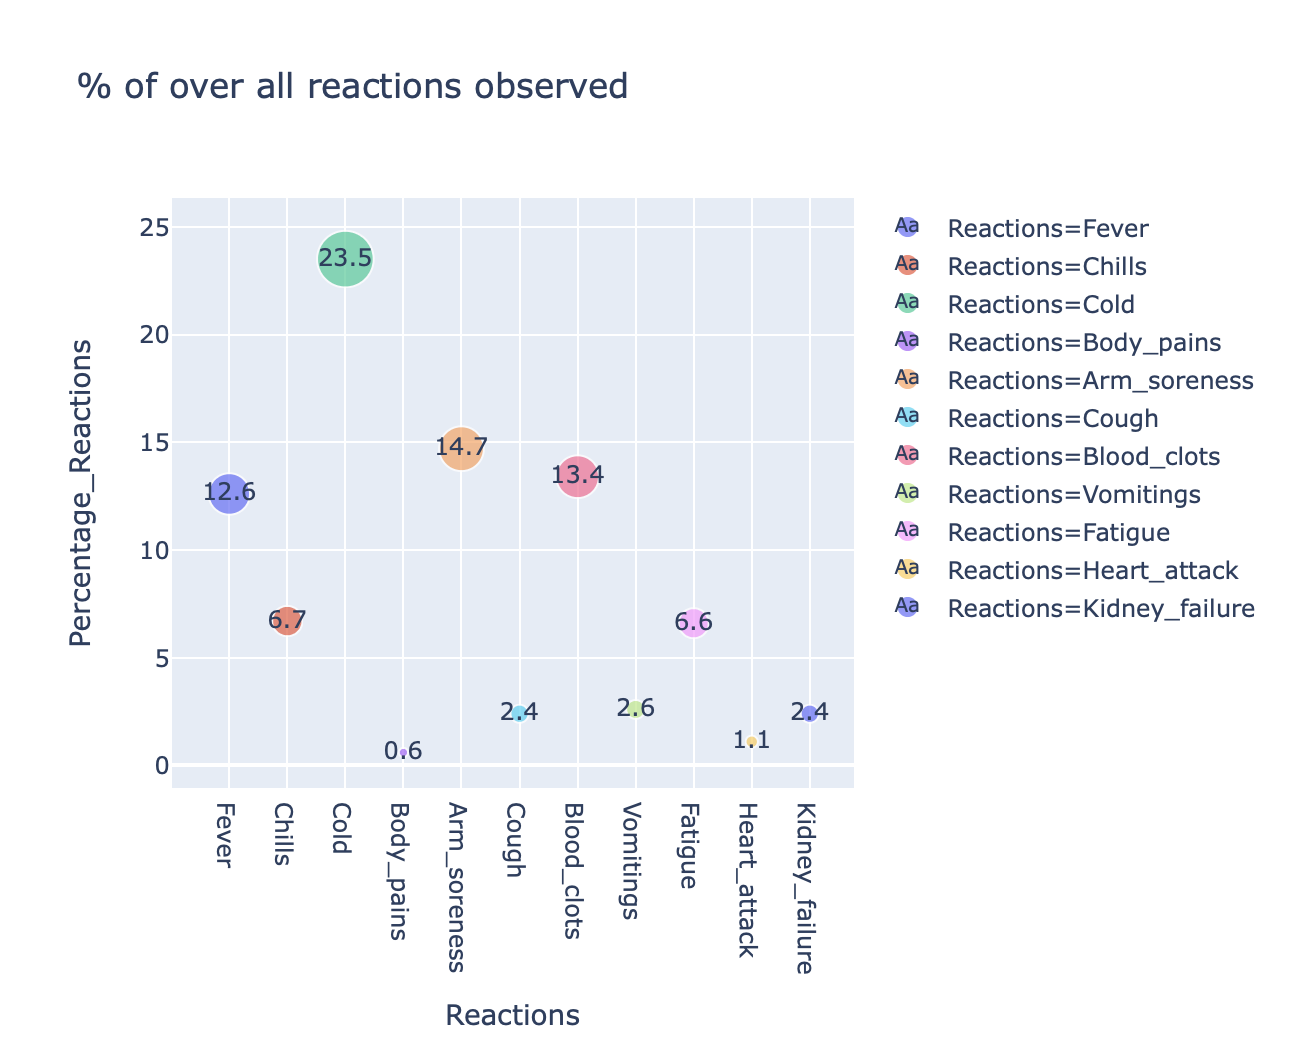